In [1]:
%load_ext autoreload
%autoreload 2
import sys
import os
import random

In [2]:
from lib.data import generate_profiles
from lib.functions import *
from lib.model import tfidf

In [3]:
# for confusion matrix
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes
#     classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

plt.show()

Automatically created module for IPython interactive environment


# Profiles
Here we generate some profiles

In [4]:
n = 10
topics = [
    'business',
    'entertainment',
    'politics',
    'sports',
    'technology',
]

profiles = generate_profiles(n, topics)
profiles

{0: ['politics', 'entertainment', 'technology'],
 1: ['business', 'politics', 'technology', 'sports', 'entertainment'],
 2: ['politics', 'sports'],
 3: ['business', 'technology'],
 4: ['sports', 'business', 'politics'],
 5: ['entertainment', 'politics'],
 6: ['business'],
 7: ['technology', 'sports', 'business', 'politics'],
 8: ['technology', 'sports', 'business', 'entertainment'],
 9: ['business', 'politics', 'sports']}

# Train model

In [5]:
tfidf_model = tfidf()
path = os.path.join('bbc-fulltext')              
tfidf_model.get_articles(path)
tfidf_model.split_data()

Number of articles: 2225
Training: 2002
Test: 223


In [6]:
%time tfidf_model.train()

Wall time: 22.6 s


# Test model on a single example

In [7]:
text = '''
Anelka, 25, is in talks over a contract extension beyond 2007 with City but is believed to fear his career 
will go stale if he stays at the club. The News of the World reports that Anelka told a French magazine: 
"I either decide to win titles or to have an easy life. 
"I think I will always choose football, if a great club makes me an offer.
'''
ranking = tfidf_model.get_ranking(text)

In [8]:
counter = 0
for doc, score in ranking:
    print("[ Score = " + "%.3f" % round(score,3) + "] " + tfidf_model.train_set[doc]['category'])
    print(tfidf_model.train_set[doc]['text'])
    counter+=1
    if counter > 3: break

[ Score = 0.369] sport
Anelka apologises for criticism

Manchester City striker Nicolas Anelka has issued an apology for criticising the ambitions of the club.

Anelka was quoted in a French newspaper as saying he would like to play in the Champions League for a bigger club. But chairman John Wardle said: "I've spoken to Nicolas and he's apologised for anything that might have been mistakenly taken from the French press. "We are a big club. Nicolas told me that he agrees with me that we are a big club." Wardle was speaking at the club's annual general meeting, where he also confirmed the club had not received any bids for the former Arsenal and Real Madrid striker. The club still owe French club PSG ÂŁ5m from the purchase of Anelka in May 2002. He has been linked with a move to Barcelona and Liverpool, and Reds skipper Steven Gerrard also revealed he is an admirer from his time on loan at Anfield. But Wardle added: "There's been no bids for Nicolas Anelka. No-one has come to me and sai

In [9]:
tfidf_model.predict(text)

'sport'

# Evaluate on test set

In [10]:
%%time
true_labels = [a['category'] for a in tfidf_model.test_set]
predictions = []

for a in tfidf_model.test_set:
    predictions.append(tfidf_model.predict(a['text']))

Wall time: 1min 38s


Confusion matrix, without normalization
[[49  0  2  0  1]
 [ 1 27  1  1  1]
 [ 2  1 44  0  0]
 [ 1  0  0 48  0]
 [ 0  0  0  0 44]]


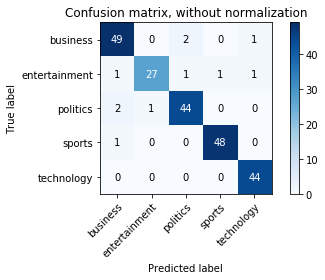

In [11]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(true_labels, predictions, classes=topics,
                      title='Confusion matrix, without normalization')

# Article assignment
Here we need to assign some articles

In [12]:
new_article = '''
tam tam tam
'''

# assign topic to article
article_topic = tfidf_model.predict(new_article)
print(article_topic)

for profile, topics in profiles.items():
    print(profile, topics)
    if article_topic in topics:
        print('Article assigned to user', profile)
    else:
        pass

entertainment
0 ['politics', 'entertainment', 'technology']
Article assigned to user 0
1 ['business', 'politics', 'technology', 'sports', 'entertainment']
Article assigned to user 1
2 ['politics', 'sports']
3 ['business', 'technology']
4 ['sports', 'business', 'politics']
5 ['entertainment', 'politics']
Article assigned to user 5
6 ['business']
7 ['technology', 'sports', 'business', 'politics']
8 ['technology', 'sports', 'business', 'entertainment']
Article assigned to user 8
9 ['business', 'politics', 'sports']
